# **Visualization**

In [1]:
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt
import utils
import json
import pandas as pd
import numpy as np

from importlib import reload
reload(utils);

import sys, os

SUMO_HOME = os.environ["SUMO_HOME"] #locating the simulator
sys.path.append(SUMO_HOME+"/tools")
import sumolib
from sumolib.visualization import helpers

## **Visualizing parking lots**

In [12]:
with open("../02_data/proximity.json", "r") as f:
    proximity = json.load(f)
    
with open("../02_data/edge_maps.json", "r") as f:
    edge_map = json.load(f)
    idx_to_edge_map = edge_map["idx_to_edge_map"]
    edge_to_idx_map = edge_map["edge_to_idx_map"]

In [13]:
parking_df = pd.read_xml("../build_inputs/MoSTScenario/scenario/in/add/most.parking.add.xml")
parking_df = parking_df[parking_df["roadsideCapacity"]>0]

In [14]:
parking_df.head()

,id,lane,startPos,endPos,roadsideCapacity,friendlyPos,edges,interval
0,1059,-153419_1,10.000000,20.000000,225.0,true,None,NaN
1,1060,-152335_1,18.191499,28.191499,75.0,true,None,NaN
2,1061,153427#0_1,10.000000,20.000000,350.0,true,None,NaN
3,1062,-153427#5_1,10.583918,20.583918,350.0,true,None,NaN
4,1063,153547_1,37.879874,47.879874,50.0,true,None,NaN


In [15]:
parking_encoded = []
for i,r in parking_df.iterrows():
    edge = r.lane.split("_")[0]
    parking_encoded.append(str(edge_to_idx_map[edge]))

In [19]:
net = sumolib.net.readNet("../build_inputs/MoSTScenario/scenario/in/most.net.xml")

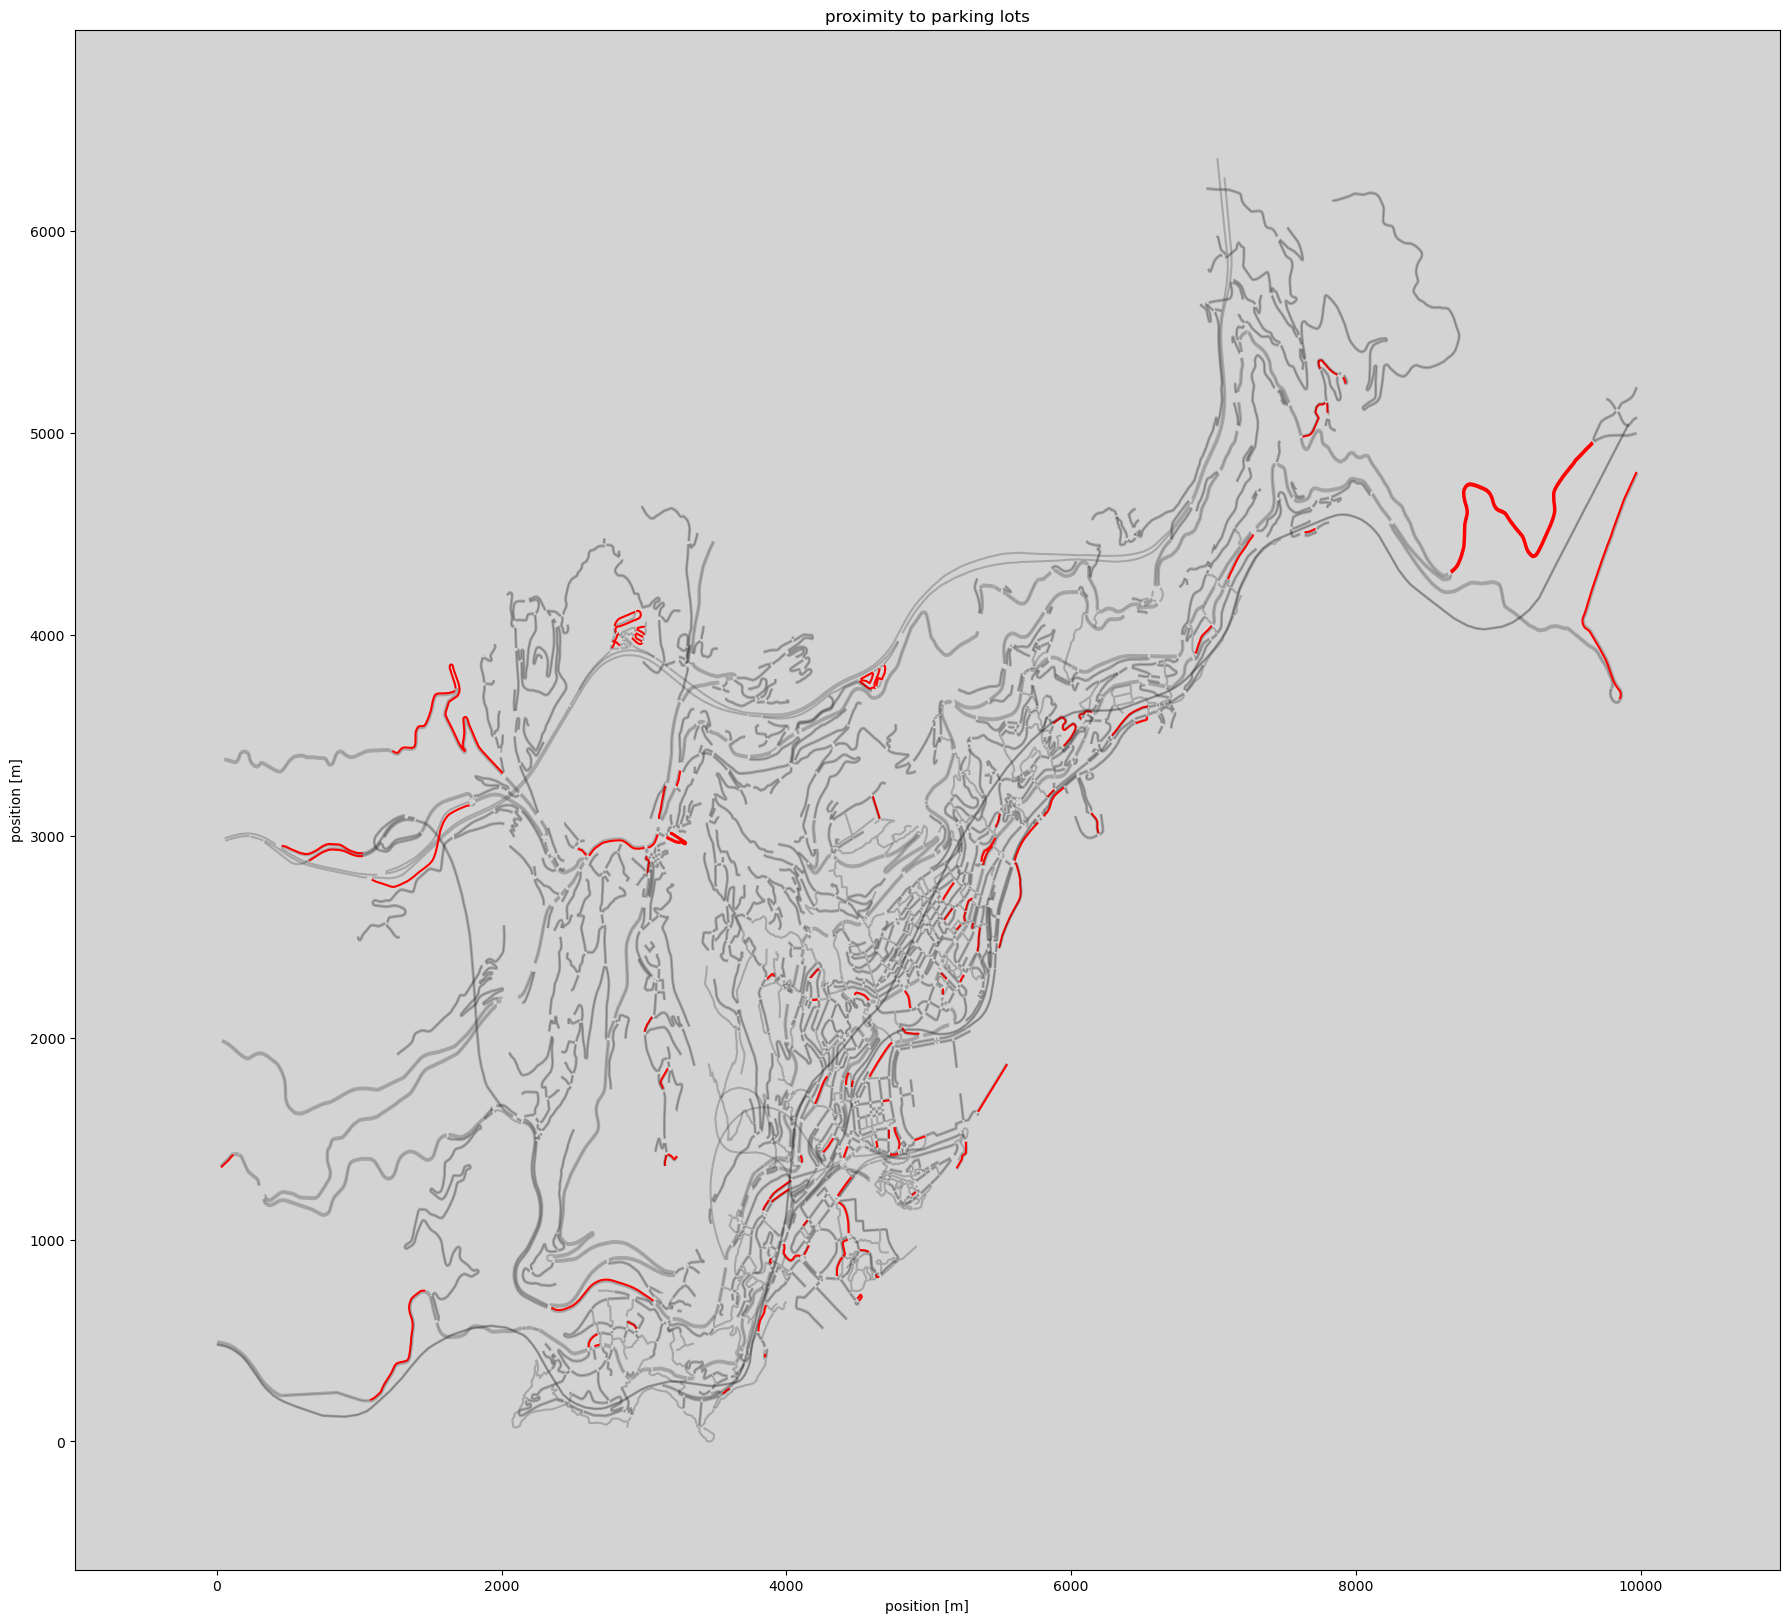

In [20]:
fig, ax = utils.plot_network_probs(net, None, idx_to_edge_map, title="proximity to parking lots",
                             special_edges=parking_encoded)
fig.show()

## **Visualizing edges in proximity of the parking lots**

In [21]:
with open("../02_data/proximity2.json", "r") as f:
    proximity = json.load(f)
    
with open("../02_data/edge_maps.json", "r") as f:
    edge_map = json.load(f)
    idx_to_edge_map = edge_map["idx_to_edge_map"]
    edge_to_idx_map = edge_map["edge_to_idx_map"]

In [22]:
proximity_encoded = []
for p in proximity:
    for edge in proximity[p]:
        proximity_encoded.append(str(edge_to_idx_map[edge]))

In [23]:
net = sumolib.net.readNet("../build_inputs/MoSTScenario/scenario/in/most.net.xml")

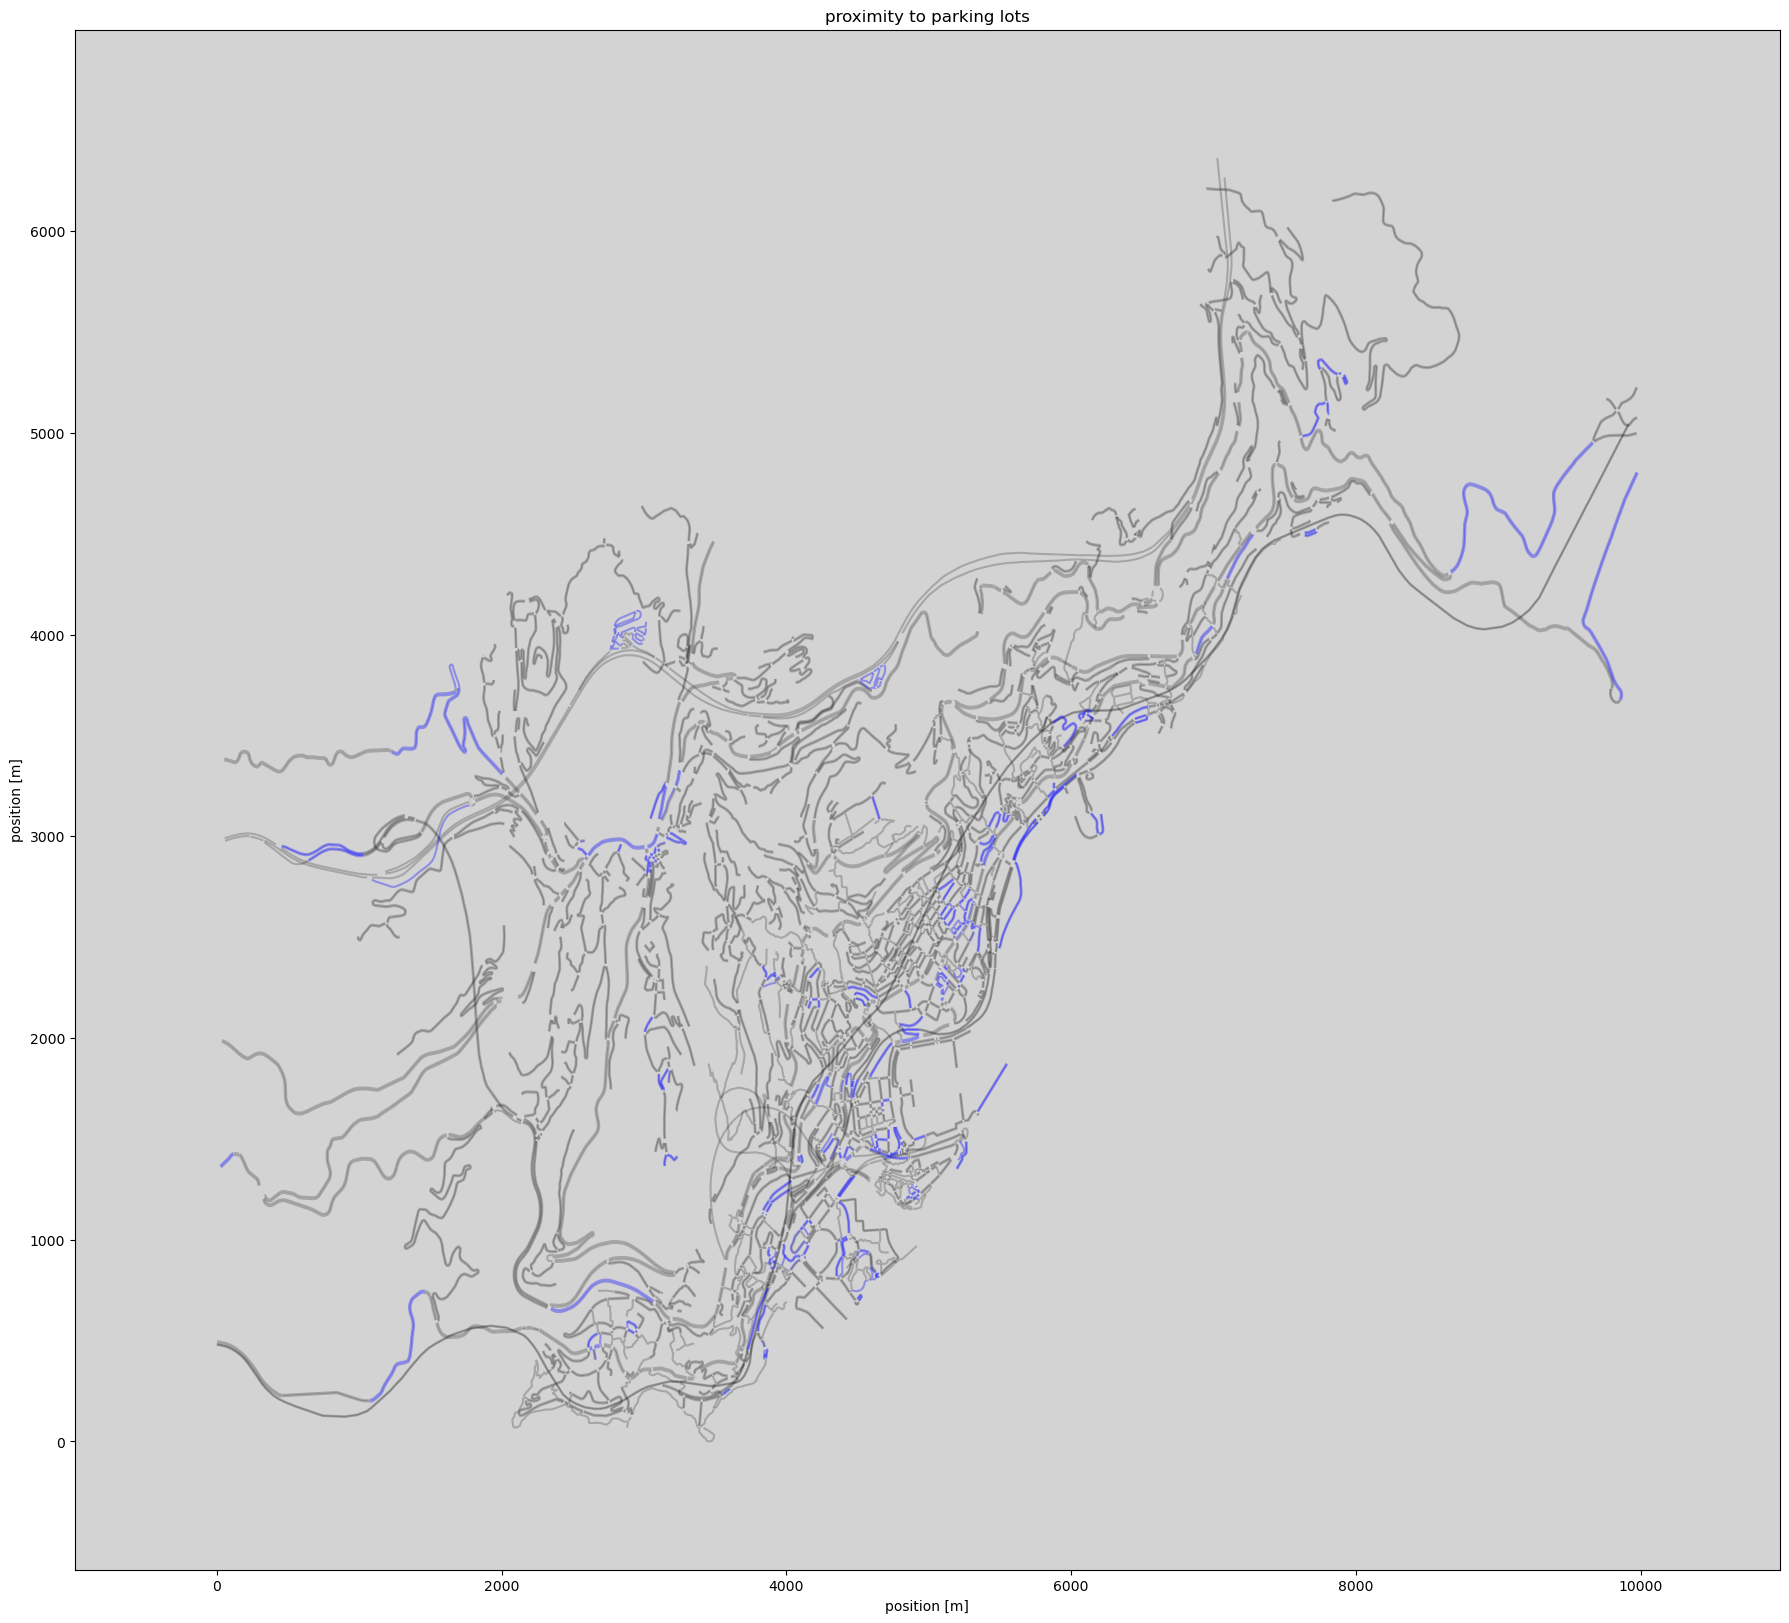

In [26]:
fig, ax = utils.plot_network_probs(net, None, idx_to_edge_map, title="proximity to parking lots",
                             special_edges=proximity_encoded,
                             special_color=(0, 0.0, 1.0, 0.33))
fig.show()